In [1]:
### import the libararies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
#### load the data

In [4]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.groupby('gender')['MonthlyCharges'].mean()

gender
Female    65.204243
Male      64.327482
Name: MonthlyCharges, dtype: float64

### * the mean monthly charges of female category is 65$

### * the mean monthly charges of male category is 45$

In [9]:
### box plot of monthly charges vs churn

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

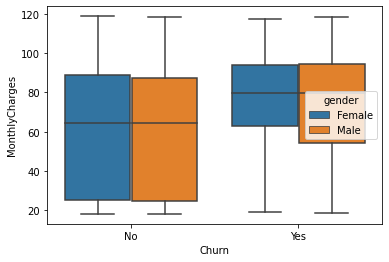

In [10]:
sns.boxplot(data=df,x='Churn',y='MonthlyCharges',hue='gender')

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Churn'>

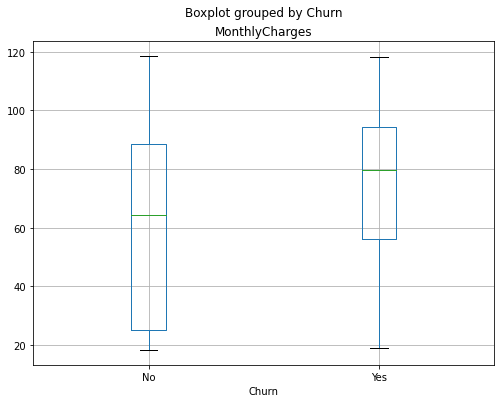

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df.boxplot(by='Churn',column='MonthlyCharges',ax=ax)

In [12]:
###  boxplot of tenure vs churn

<AxesSubplot:title={'center':'tenure'}, xlabel='Churn'>

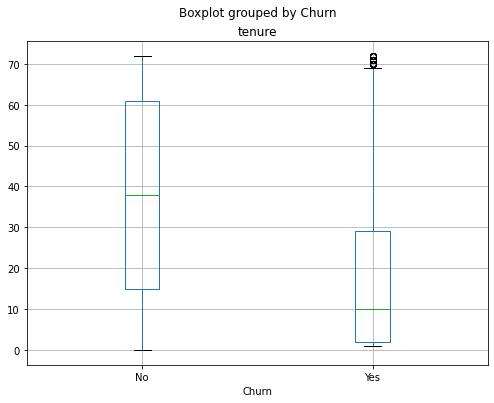

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df.boxplot(by='Churn',column='tenure',ax=ax)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

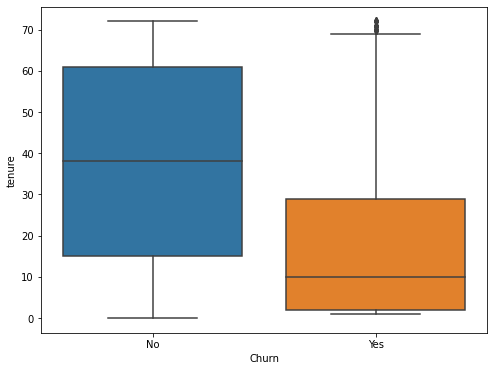

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.boxplot(data=df,x='Churn',y='tenure',ax=ax)

### train the machine learning model with Logistic Regression

### dependent and independent features

In [15]:
x= [['TotalCharges','MonthlyCharges']]
y=['Churn']

In [16]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [17]:
### encode the class label in 1 & 0

df['churn_class'] = df['Churn'].apply(lambda x: 1 if x=="Yes" else 0)

In [18]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1


In [19]:
x= df[['tenure','MonthlyCharges']]
y=df['churn_class']

In [20]:
### split the dataset in train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
print(x_train.shape,x_test.shape)

(5282, 2) (1761, 2)


In [22]:
lr_model = LogisticRegression(fit_intercept=True,max_iter=1000,verbose=True)

In [23]:
lr_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, verbose=True)

In [24]:
lr_model.intercept_

array([-1.7928546])

In [25]:
lr_model.coef_

array([[-0.05640304,  0.03338674]])

In [26]:
### evaluate the model performance

In [27]:
train_prob = lr_model.predict_proba(x_train)

In [28]:
test_prob = lr_model.predict_proba(x_test)

In [29]:
train_pred = lr_model.predict(x_train)
test_pred = lr_model.predict(x_test)

In [30]:
#### accuracy score

In [31]:
train_accuracy = accuracy_score(y_train,train_pred)
print("The accuracy on train data is ", train_accuracy)

The accuracy on train data is  0.7864445285876562


In [32]:
test_accuracy = accuracy_score(y_test,test_pred)
print("The accuracy on train data is ", test_accuracy)

The accuracy on train data is  0.7745599091425327


In [33]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train,train_pred)
print(cm)

[[3516  360]
 [ 768  638]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

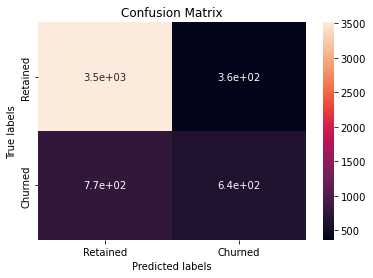

In [34]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [35]:
accuracy = (3516+638)/(3516+360+768+638)

In [36]:
accuracy

0.7864445285876562

In [37]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1298
           1       0.60      0.43      0.50       463

    accuracy                           0.77      1761
   macro avg       0.71      0.66      0.68      1761
weighted avg       0.76      0.77      0.76      1761



In [38]:
#### take the user input for predict the customer churn or not 

In [39]:
month_charges = input('give the Monthly charges value')
tenure_period = input('tenure period of the user')
input_data = [[month_charges,tenure_period]]

give the Monthly charges value70.70
tenure period of the user151.75


In [42]:
def predict_churn(input_data):
    prediction = lr_model.predict(input_data)
    if prediction[0]==0:
        print('customer will not churn or retain')
    else:
        print('customer will churn')
predict_churn(input_data)

customer will not churn or retain


In [43]:
predict_churn([[55.95,1157.05]])

customer will churn
